In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context="notebook")

### Inicio del analisis

In [16]:
df = pd.read_csv("../../data/raw/insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

(1338, 7)


<AxesSubplot:xlabel='charges', ylabel='Count'>

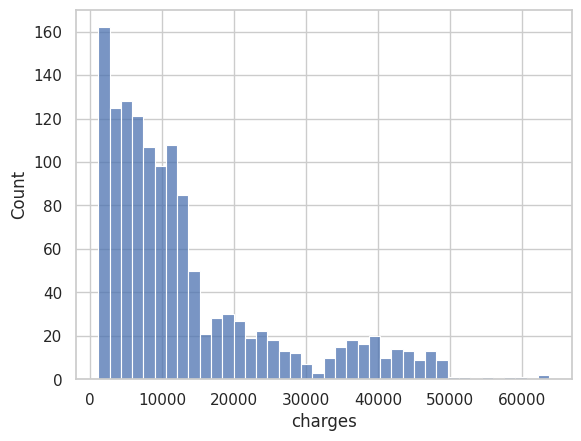

In [17]:
print(df.shape)
sns.histplot(data=df, x="charges", bins=40)


In [18]:
df[df.charges > 50000]
df = df[df.charges < 50000]

### Viendo Correlaciones

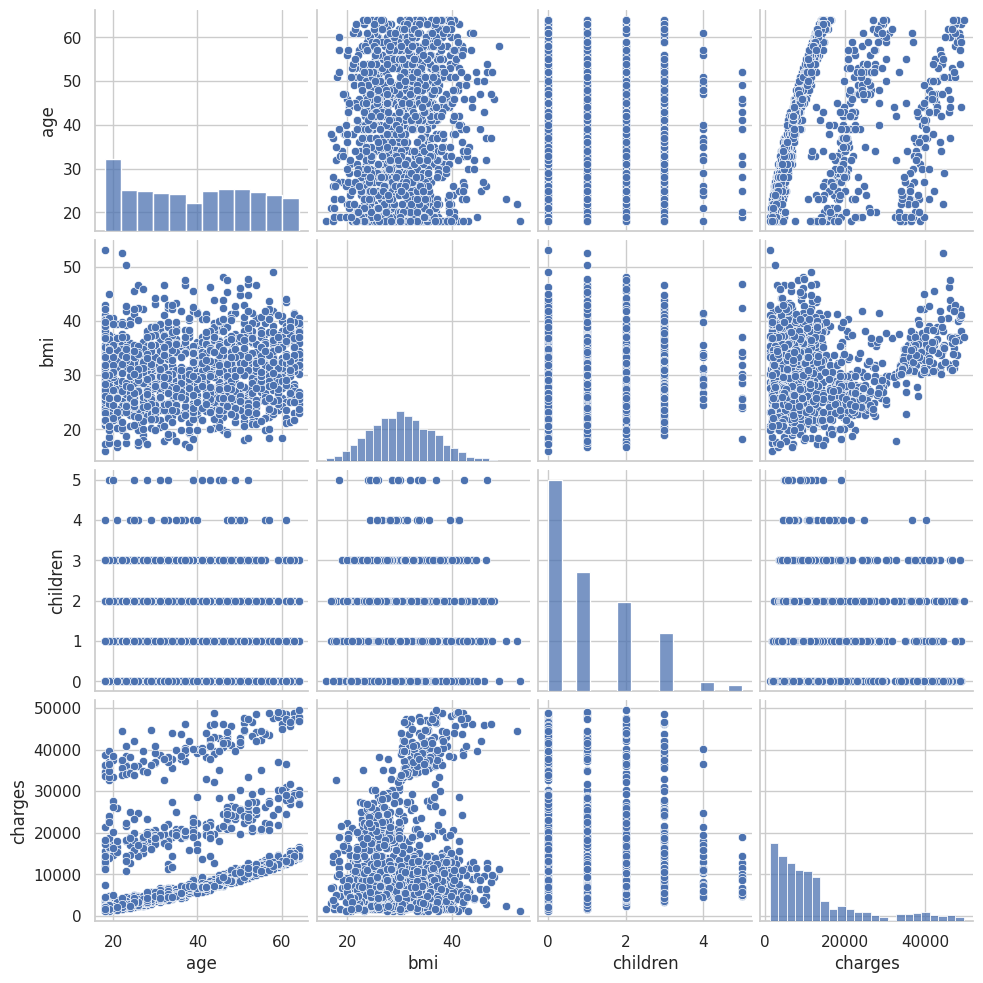

In [19]:
sns.pairplot(df, height=2.5)
plt.show()

<AxesSubplot:>

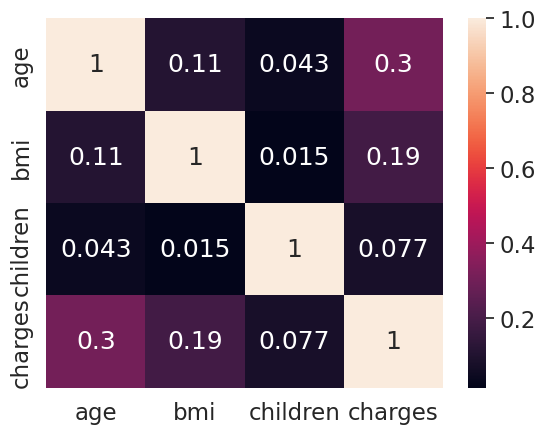

In [20]:
numeric_cols = ["age", "bmi", "children", 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

In [21]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)
df.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

### Creacion del modelo

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X_cols = list(set(df.columns)-set(["charges"]))
y_cols = ["charges"]

X = df[X_cols].values
y = df[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
y_pred.shape

(333, 1)

Funciones de metricas

In [25]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4)) # es un buen modelo, arrba de 75 es bueno, 85 es excelente, 90 es perfecto, si es 100 no es bueno
print("mse ", mse.round(4)) # parece ser bueno, por la estandarizacion lo pone entre 3 y -3

r2  0.7464
mse  0.2676


In [26]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [28]:
y_test = y_test.reshape(-1)

print("=" * 80)
print("Summary")
stats.summary(model, X_test, y_test, X_cols)

Summary
Residuals:
   Min      1Q  Median     3Q    Max
-2.032 -0.1425  0.0799 0.2114 0.8538


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.009093    0.028466  -0.3194  0.749600
region_southeast -0.029477    0.034663  -0.8504  0.395725
age               0.304578    0.028339  10.7478  0.000000
children          0.046494    0.031688   1.4673  0.143251
bmi               0.167366    0.030358   5.5130  0.000000
smoker_yes        0.793643    0.028744  27.6107  0.000000
region_southwest -0.033688    0.033002  -1.0208  0.308094
region_northwest -0.004871    0.033506  -0.1454  0.884504
sex_male         -0.006443    0.028549  -0.2257  0.821586
---
R-squared:  0.74642,    Adjusted R-squared:  0.74015
F-statistic: 119.21 on 8 features


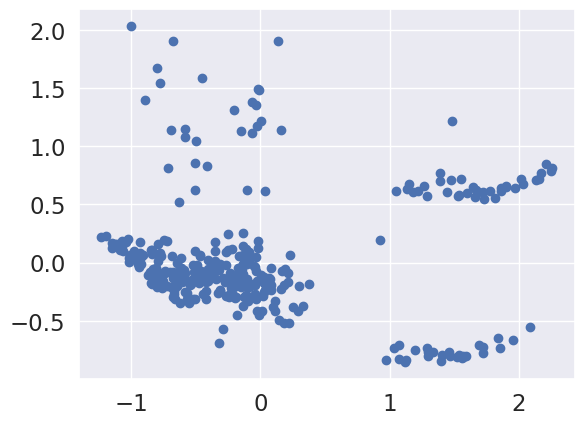

In [31]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

## Mejorando el modelo

In [38]:
df_second = df.copy()
df_second['age2'] = df_second.age ** 2
df_second["sobrepeso"] = (df_second.bmi >= 30).astype(int)
df_second["sobrepeso*fumador"] = df_second.sobrepeso * df_second.smoker_yes

In [39]:
X_cols = list(set(df_second.columns)-set(["charges"]))
y_cols = ["charges"]

X = df_second[X_cols].values
y = df_second[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4)) # es un buen modelo, arrba de 75 es bueno, 85 es excelente, 90 es perfecto, si es 100 no es bueno
print("mse ", mse.round(4)) # parece ser bueno, por la estandarizacion lo pone entre 3 y -3

r2  0.8498
mse  0.1375


In [41]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [42]:
y_test = y_test.reshape(-1)

print("=" * 80)
print("Summary")
stats.summary(model, X_test, y_test, X_cols)

Summary
Residuals:
    Min     1Q  Median     3Q    Max
-1.9647 0.0522  0.1019 0.1443 0.2997


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.000191    0.020450  -0.0093  0.992551
sobrepeso         -0.054414    0.031698  -1.7167  0.086973
region_southeast  -0.038798    0.024346  -1.5936  0.111979
sobrepeso*fumador  0.498118    0.029478  16.8979  0.000000
age               -0.021579    0.109541  -0.1970  0.843950
children           0.067515    0.020898   3.2307  0.001358
bmi                0.068935    0.031092   2.2171  0.027291
smoker_yes         0.460759    0.025805  17.8555  0.000000
age2               0.336911    0.108611   3.1020  0.002087
region_southwest  -0.057817    0.024450  -2.3647  0.018620
region_northwest  -0.017079    0.023842  -0.7163  0.474298
sex_male          -0.025055    0.020535  -1.2201  0.223281
---
R-squared:  0.84980,    Adjusted R-squared:  0.84465
F-statistic: 165.10 on 11 features


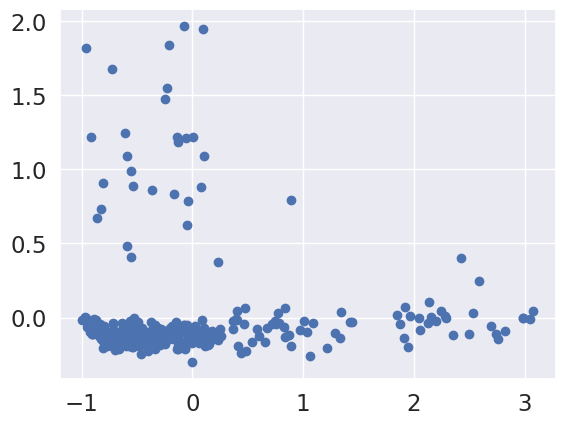

In [43]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

In [51]:
X_cols = ["sobrepeso*fumador", "smoker_yes", "age2", "children"]
y_cols = ["charges"]

X = df_second[X_cols].values
y = df_second[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [52]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4)) # es un buen modelo, arrba de 75 es bueno, 85 es excelente, 90 es perfecto, si es 100 no es bueno
print("mse ", mse.round(4)) # parece ser bueno, por la estandarizacion lo pone entre 3 y -3

r2  0.8441
mse  0.1402


In [53]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [54]:
y_test = y_test.reshape(-1)

print("=" * 80)
print("Summary")
stats.summary(model, X_test, y_test, X_cols)

Summary
Residuals:
    Min     1Q  Median     3Q    Max
-1.9185 0.0747  0.1116 0.1352 0.4064


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.000964    0.020627  -0.0467  0.962765
sobrepeso*fumador  0.494056    0.027518  17.9540  0.000000
smoker_yes         0.461422    0.027366  16.8614  0.000000
age2               0.329873    0.021700  15.2018  0.000000
children           0.066039    0.020655   3.1973  0.001521
---
R-squared:  0.84409,    Adjusted R-squared:  0.84219
F-statistic: 443.93 on 4 features


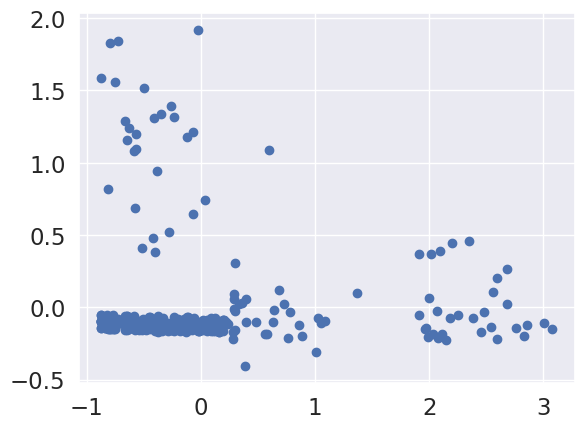

In [55]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()